In [1]:
%matplotlib inline

import numpy as np

import menpo.io as mio
from menpo.image import Image
from menpo.feature import centralize, normalize_norm, normalize_std
from menpo.landmark import labeller, ibug_face_49
from menpo.visualize import visualize_images

from alaborticcv2015.deepconvkernel.discriminative import (
    DiscriminativeLDCN, learn_mccf_filters)

# MCCF LDCN 

Choose whether to work with color or greyscale images and whether to learn the filters from landmarks or regular grid:

In [2]:
color = False
landmarks = True

if color:
    n_channels = 3
else:
    n_channels = 1

In [39]:
images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', verbose=True, 
                           max_images=100):
    i.crop_to_landmarks_proportion_inplace(1)
    i = i.rescale_landmarks_to_diagonal_range(100)
    if not color:
        if i.n_channels == 3:
            i = i.as_greyscale(mode='average')
    labeller(i, 'PTS', ibug_face_49)
    images.append(i)

- Loading 100 assets: [====================] 100%

Build a MCCF LinDeepConvNet:

In [55]:
net = DiscriminativeLDCN(learn_filters=learn_mccf_filters,
                         n_layers=2,
                         architecture=3,
                         normalize_patches=normalize_norm,
                         normalize_filters=normalize_norm, 
                         patch_shape=(7, 7))

if landmarks:
    net.learn_network_from_landmarks(images, group='ibug_face_49', verbose=True)
else:
    net.learn_network_from_grid(images, stride=(4, 4), verbose=True)

- Learning network
  - Layer 0: Done!
  - Layer 1: Done!


In [56]:
print '# of layers:', net.n_layers
print '# of filters:', net.n_filters
print '# of filters per layer:', net.n_filters_layer
print 'filters shape:', net.filters_shape

# of layers: 2
# of filters: 98
# of filters per layer: [49, 49]
filters shape: (7, 7)


Visualize the previous filters using the previous LinDeepConvNet:

In [57]:
filters = net.filters_spatial()

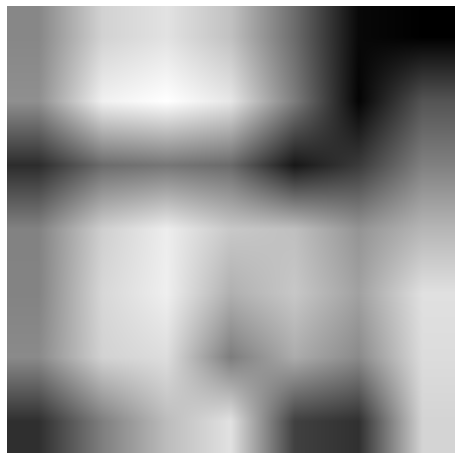

In [43]:
visualize_images(filters[0])

Second layer spatial filters:

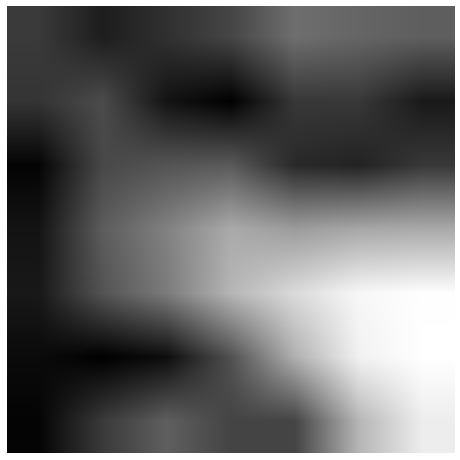

In [44]:
visualize_images(filters[1])

We can also visualize the previous filters on the frequency domain:

In [45]:
filters_frequecy = net.filters_frequency(ext_shape=(50, 50))

First layer filters in the frequency domain:

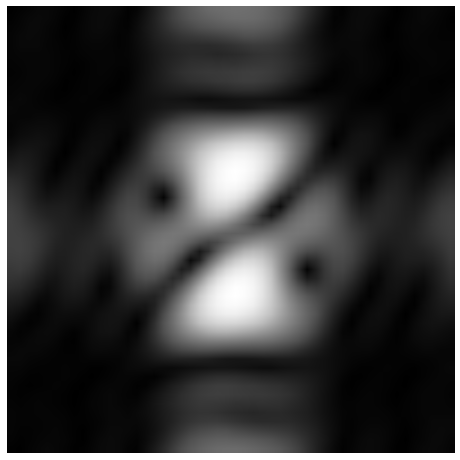

In [46]:
visualize_images(filters_frequecy[0])

Second layer filters in the frequency domain:

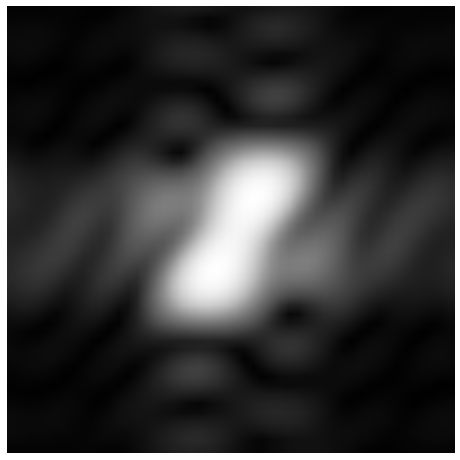

In [47]:
visualize_images(filters_frequecy[1])

Visualize Deep Convolutional Kernels:

In [48]:
kernels = net.kernels_spatial(ext_shape=(50, 50))

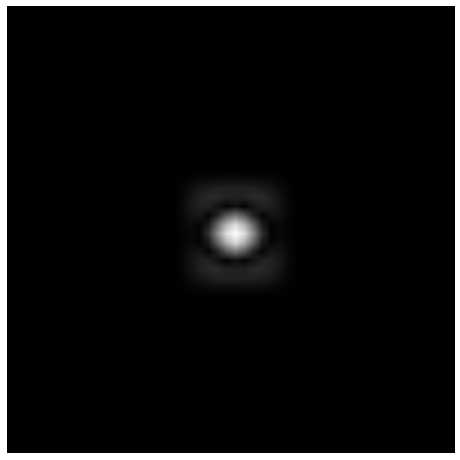

In [49]:
visualize_images(kernels)

In [50]:
kernels = net.kernels_frequency(ext_shape=(50, 50))

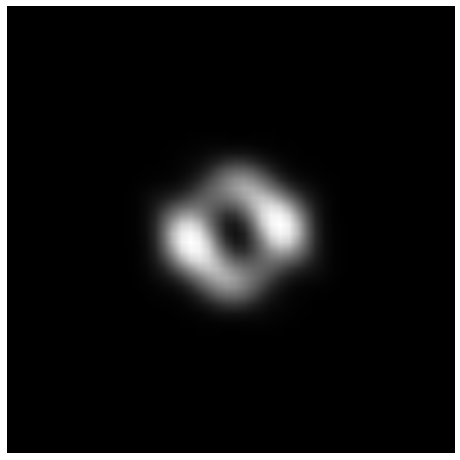

In [51]:
visualize_images(kernels)

Load images:

In [33]:
images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/testset/', verbose=True, 
                           max_images=10):
    i.crop_to_landmarks_proportion_inplace(1)
    i = i.rescale_landmarks_to_diagonal_range(100)
    if not color:
        if i.n_channels == 3:
            i = i.as_greyscale(mode='average')
    images.append(i)

- Loading 10 assets: [====================] 100%

Choose one of the previous images:

In [34]:
image = images[0]

Compute network features:

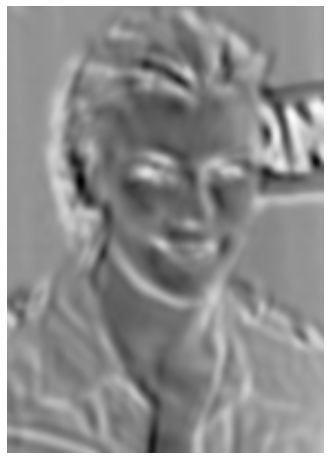

In [52]:
Image(np.real(net.network_response(image).pixels)).view_widget()

Compute deep convolutional kernel features:

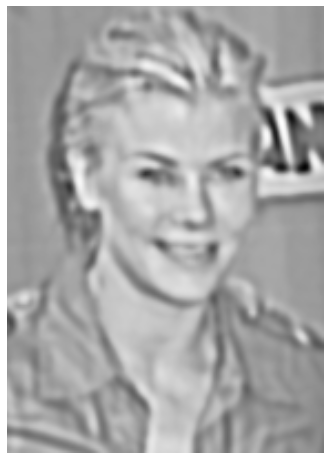

In [53]:
Image(np.real(net.kernel_response(image).pixels)).view_widget()

Check Network and Kernel equivalence:

In [54]:
network_r = net.network_response(image)
kernel_r = net.kernel_response(image)

print network_r.as_vector().dot(network_r.as_vector())
print kernel_r.as_vector().dot(kernel_r.as_vector())

(85.5013416917-4.33025390269e-14j)
(85.6913880693-1.71502380552e-15j)
